### Case Study: Customer Churn Prediction

## 🔍 Objective
The objective of this case study is to develop a predictive model for customer churn in a banking dataset.
By leveraging machine learning techniques, we aim to identify key factors that contribute to customer attrition
and provide actionable insights for improving customer retention.

## 📊 Churn Models (Why Customers Leave)

- **What it is**: Predicts which customers are likely to leave the bank (churn) so the bank can keep them.
- **How it works**: It looks at data like how often they use their account, if they have complaints, or if they stopped using certain services.

### 📊 Types of Churn
- **Voluntary Churn**: Customers choose to leave (e.g., switching to another bank).
- **Involuntary Churn**: Customers leave for other reasons (e.g., inactivity or account issues).

### 🔬 Techniques Used
- **Logistic Regression**: A simple model to predict the likelihood of churn.
- **Decision Trees/Random Forests**: More complex models to classify customers as likely to churn or not.
- **Neural Networks**: Advanced model for complex churn predictions.

### 🎯 Example
If a customer is about to leave, the bank can offer them special deals or rewards to keep them.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier


### Load and Preprocess Data

In [5]:
# Read the CSV file into a Pandas DataFrame
customer_data = r"C:\Users\sriya\Sriyanka\Churn_Modelling.csv"
df = pd.read_csv(customer_data)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Display the first few rows to understand the structure
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Retrieve column names
col_list = df.columns.tolist()
print("Column Names:", col_list)


Column Names: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


### Drop non-essential columns

In [9]:
col_drop = ['RowNumber', 'CustomerId', 'Surname']
df_cleaned = df.drop(columns=col_drop, axis=1)
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Encode Categorical Variables
##### Label Encoding for 'Geography' and 'Gender'

**Label Encoding** is a method where each category in a column is replaced with a numeric value. This is a simple transformation where the categories are assigned integer labels. For example:
- `Gender`: Female → 0, Male → 1
- `Geography`: France → 0, Spain → 1, Germany → 2

While **Label Encoding** is simple and efficient, it may introduce unintended ordinal relationships between the categories (e.g., treating "Germany" as larger than "Spain" or "France"), which may not be appropriate for categorical variables without any intrinsic order.

Here is the code to apply **Label Encoding** to the `Geography` and `Gender` columns:

In [11]:
# Convert categorical variables 'Gender' and 'Geography' into numerical values
labelencoder = LabelEncoder()
df_cleaned['Gender'] = labelencoder.fit_transform(df['Gender'])
df_cleaned['Geography'] = labelencoder.fit_transform(df['Geography'])


In [13]:
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### Define Features and Target Variable

In [14]:
X = df_cleaned.drop(['Exited'], axis=1)  # Feature dataset
y = df_cleaned['Exited']  # Target variable

### Check for Multicollinearity using Variance Inflation Factor (VIF)

In [15]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variable'] = X.columns
print("Variance Inflation Factor (VIF) values:")
print(vif)

Variance Inflation Factor (VIF) values:
         VIF         Variable
0  21.137926      CreditScore
1   1.816454        Geography
2   2.165771           Gender
3  12.331312              Age
4   3.872398           Tenure
5   2.649879          Balance
6   7.730366    NumOfProducts
7   3.289349        HasCrCard
8   2.074464   IsActiveMember
9   3.886897  EstimatedSalary


### Split Data into Training and Test Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train Machine Learning Model - Random Forest Classifier

In [17]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

### Make Predictions

In [18]:
predictions_rf = classifier.predict(X_test)

### Evaluate Model Performance

In [22]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, predictions_rf))
print("Accuracy Score:", accuracy_score(y_test, predictions_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000

Accuracy Score: 0.8645


### Train Machine Learning Model - XGBoost Classifier

In [23]:
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Make Predictions

In [25]:
predictions_xgb = model.predict(X_test)

### Evaluate Model Performance

In [26]:
print("XGBoost Classifier Report:")
print(classification_report(y_test, predictions_xgb))
print("Accuracy Score:", accuracy_score(y_test, predictions_xgb))


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.67      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Accuracy Score: 0.85


### Feature Importance Analysis

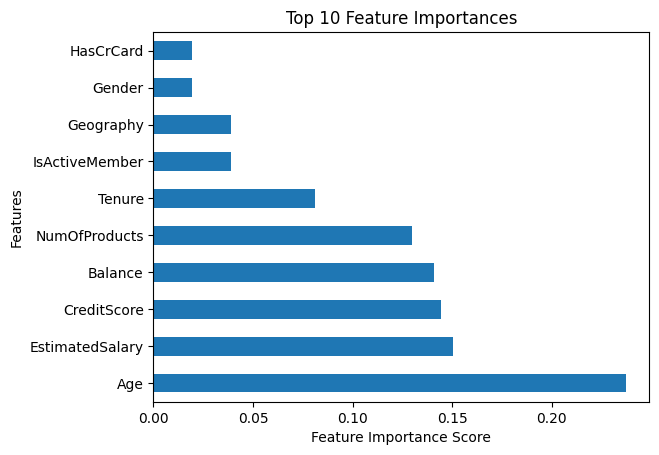

In [27]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

### 🏦 Conclusion: Customer Churn Prediction

Our study shows that **Age, Salary, Credit Score, and Account Balance** are key reasons why customers leave the bank.  

📊 **Model Performance:**
- **Random Forest Accuracy:** 86.45% ✅
- **XGBoost Accuracy:** 85% 📉  

💡 **Recommendations to Reduce Churn:**  
✔ Offer better deals and loyalty programs 🎁  
✔ Improve customer support and engagement 🤝  
✔ Identify at-risk customers early and take proactive steps 🚀  
